In [27]:
import pandas as pd
import nltk
#nltk.download("stopwords")
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('cryptocurrency_news.csv')

In [4]:
data.shape

(675, 3)

In [5]:
data.head()

,Article Headlines,Article Date,Article Content
0,Crypto News From the Spanish-Speaking World: S...,2019-10-06,Cointelegraph en Español presents a weekly di...
1,Crypto News From the German-Speaking World: Se...,2019-10-06,This week’s selected cryptocurrency and block...
2,Liechtenstein’s Parliament Unanimously Approve...,2019-10-05,Liechtenstein’s Parliament unanimously passed...
3,Former US Army Interpreter Gets 30 Years for D...,2019-10-05,Former Iraqi interpreter for the U.S. militar...
4,Tether and Bitfinex Expect a Market Manipulati...,2019-10-05,Tether and its affiliate exchange Bitfinex an...


In [6]:
#Drop duplicates from dataset
data = data.drop_duplicates()

In [7]:
data.shape

(522, 3)

In [8]:
data

,Article Headlines,Article Date,Article Content
0,Crypto News From the Spanish-Speaking World: S...,2019-10-06,Cointelegraph en Español presents a weekly di...
1,Crypto News From the German-Speaking World: Se...,2019-10-06,This week’s selected cryptocurrency and block...
2,Liechtenstein’s Parliament Unanimously Approve...,2019-10-05,Liechtenstein’s Parliament unanimously passed...
3,Former US Army Interpreter Gets 30 Years for D...,2019-10-05,Former Iraqi interpreter for the U.S. militar...
4,Tether and Bitfinex Expect a Market Manipulati...,2019-10-05,Tether and its affiliate exchange Bitfinex an...
...,...,...,...
666,Researchers Detect New North Korea-Linked MacO...,2019-12-04,Security researchers have discovered a new cr...
667,Kazakhstan Won’t Tax Cryptocurrency Mining: Re...,2019-12-04,Crypto mining is “purely technological progre...
668,Crypto Exchange Gemini Burnt One-Fifth of Its ...,2019-12-04,Cryptocurrency exchange Gemini burnt about on...
669,Saxo Bank’s Outrageous Prediction 2020: Asia L...,2019-12-04,"In its new “Outrageous Predictions” report, D..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 670
Data columns (total 3 columns):
Article Headlines    522 non-null object
Article Date         522 non-null object
Article Content      522 non-null object
dtypes: object(3)
memory usage: 16.3+ KB


In [10]:
data.isnull().any()

Article Headlines    False
Article Date         False
Article Content      False
dtype: bool

In [11]:
#Change Article Content to lower case
data['Article Content'] = data['Article Content'].str.lower()
data.head()

,Article Headlines,Article Date,Article Content
0,Crypto News From the Spanish-Speaking World: S...,2019-10-06,cointelegraph en español presents a weekly di...
1,Crypto News From the German-Speaking World: Se...,2019-10-06,this week’s selected cryptocurrency and block...
2,Liechtenstein’s Parliament Unanimously Approve...,2019-10-05,liechtenstein’s parliament unanimously passed...
3,Former US Army Interpreter Gets 30 Years for D...,2019-10-05,former iraqi interpreter for the u.s. militar...
4,Tether and Bitfinex Expect a Market Manipulati...,2019-10-05,tether and its affiliate exchange bitfinex an...


In [12]:
#Remove special characters from Article Content
data['Article Content'] = data['Article Content'].str.replace('[^$\w\s]','')
data

,Article Headlines,Article Date,Article Content
0,Crypto News From the Spanish-Speaking World: S...,2019-10-06,cointelegraph en español presents a weekly di...
1,Crypto News From the German-Speaking World: Se...,2019-10-06,this weeks selected cryptocurrency and blockc...
2,Liechtenstein’s Parliament Unanimously Approve...,2019-10-05,liechtensteins parliament unanimously passed ...
3,Former US Army Interpreter Gets 30 Years for D...,2019-10-05,former iraqi interpreter for the us military ...
4,Tether and Bitfinex Expect a Market Manipulati...,2019-10-05,tether and its affiliate exchange bitfinex an...
...,...,...,...
666,Researchers Detect New North Korea-Linked MacO...,2019-12-04,security researchers have discovered a new cr...
667,Kazakhstan Won’t Tax Cryptocurrency Mining: Re...,2019-12-04,crypto mining is purely technological progres...
668,Crypto Exchange Gemini Burnt One-Fifth of Its ...,2019-12-04,cryptocurrency exchange gemini burnt about on...
669,Saxo Bank’s Outrageous Prediction 2020: Asia L...,2019-12-04,in its new outrageous predictions report dani...


In [13]:
#Remove stopwords from Article Content
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Article Content'] = data['Article Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data

,Article Headlines,Article Date,Article Content
0,Crypto News From the Spanish-Speaking World: S...,2019-10-06,cointelegraph en español presents weekly diges...
1,Crypto News From the German-Speaking World: Se...,2019-10-06,weeks selected cryptocurrency blockchain news ...
2,Liechtenstein’s Parliament Unanimously Approve...,2019-10-05,liechtensteins parliament unanimously passed b...
3,Former US Army Interpreter Gets 30 Years for D...,2019-10-05,former iraqi interpreter us military sentenced...
4,Tether and Bitfinex Expect a Market Manipulati...,2019-10-05,tether affiliate exchange bitfinex announce pr...
...,...,...,...
666,Researchers Detect New North Korea-Linked MacO...,2019-12-04,security researchers discovered new cryptocurr...
667,Kazakhstan Won’t Tax Cryptocurrency Mining: Re...,2019-12-04,crypto mining purely technological progress le...
668,Crypto Exchange Gemini Burnt One-Fifth of Its ...,2019-12-04,cryptocurrency exchange gemini burnt onefifth ...
669,Saxo Bank’s Outrageous Prediction 2020: Asia L...,2019-12-04,new outrageous predictions report danish saxo ...


In [14]:
#Calculate the sentiment score and determine the category using TextBlob
sentiment_scores = [round(TextBlob(article).sentiment.polarity, 3) for article in data['Article Content']]

In [15]:
type(sentiment_scores)

list

In [16]:
#Pass all the values into new pandas dataframe
df = pd.DataFrame([list(data['Article Date']),list(data['Article Content']), sentiment_scores]).T
df

,0,1,2
0,2019-10-06,cointelegraph en español presents weekly diges...,0
1,2019-10-06,weeks selected cryptocurrency blockchain news ...,0
2,2019-10-05,liechtensteins parliament unanimously passed b...,0.25
3,2019-10-05,former iraqi interpreter us military sentenced...,-0.087
4,2019-10-05,tether affiliate exchange bitfinex announce pr...,0
...,...,...,...
517,2019-12-04,security researchers discovered new cryptocurr...,0.118
518,2019-12-04,crypto mining purely technological progress le...,0.214
519,2019-12-04,cryptocurrency exchange gemini burnt onefifth ...,0
520,2019-12-04,new outrageous predictions report danish saxo ...,-0.288


In [17]:
#Rename column names
df.columns = ['Article_Date', 'Article_Content', 'Sentiment_Score']
df.head()

,Article_Date,Article_Content,Sentiment_Score
0,2019-10-06,cointelegraph en español presents weekly diges...,0
1,2019-10-06,weeks selected cryptocurrency blockchain news ...,0
2,2019-10-05,liechtensteins parliament unanimously passed b...,0.25
3,2019-10-05,former iraqi interpreter us military sentenced...,-0.087
4,2019-10-05,tether affiliate exchange bitfinex announce pr...,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 3 columns):
Article_Date       522 non-null object
Article_Content    522 non-null object
Sentiment_Score    522 non-null object
dtypes: object(3)
memory usage: 12.4+ KB


In [19]:
#Convert Sentiment_Score into float
df['Sentiment_Score'] = df.Sentiment_Score.astype('float')
df.head()

,Article_Date,Article_Content,Sentiment_Score
0,2019-10-06,cointelegraph en español presents weekly diges...,0.000
1,2019-10-06,weeks selected cryptocurrency blockchain news ...,0.000
2,2019-10-05,liechtensteins parliament unanimously passed b...,0.250
3,2019-10-05,former iraqi interpreter us military sentenced...,-0.087
4,2019-10-05,tether affiliate exchange bitfinex announce pr...,0.000


In [20]:
sentiment_category = ['positive' if score > 0 
                                        else 'negative' if score < 0 
                                            else 'neutral' 
                                                for score in df['Sentiment_Score']]

In [21]:
news_df = df.copy()
news_df['Sentiment_Category'] = sentiment_category
news_df

,Article_Date,Article_Content,Sentiment_Score,Sentiment_Category
0,2019-10-06,cointelegraph en español presents weekly diges...,0.000,neutral
1,2019-10-06,weeks selected cryptocurrency blockchain news ...,0.000,neutral
2,2019-10-05,liechtensteins parliament unanimously passed b...,0.250,positive
3,2019-10-05,former iraqi interpreter us military sentenced...,-0.087,negative
4,2019-10-05,tether affiliate exchange bitfinex announce pr...,0.000,neutral
...,...,...,...,...
517,2019-12-04,security researchers discovered new cryptocurr...,0.118,positive
518,2019-12-04,crypto mining purely technological progress le...,0.214,positive
519,2019-12-04,cryptocurrency exchange gemini burnt onefifth ...,0.000,neutral
520,2019-12-04,new outrageous predictions report danish saxo ...,-0.288,negative


In [22]:
news_df = news_df.groupby(by=['Article_Date','Sentiment_Category']).describe()
news_df = news_df.reset_index()
news_df.head()

Article_Date Sentiment_Category Sentiment_Score                           \
                                            count    mean       std    min   
0   2019-10-04           negative             1.0 -0.2250       NaN -0.225   
1   2019-10-04            neutral             3.0  0.0000  0.000000  0.000   
2   2019-10-04           positive             2.0  0.1340  0.093338  0.068   
3   2019-10-05           negative             2.0 -0.0555  0.044548 -0.087   
4   2019-10-05            neutral             2.0  0.0000  0.000000  0.000   

                                    
       25%     50%      75%    max  
0 -0.22500 -0.2250 -0.22500 -0.225  
1  0.00000  0.0000  0.00000  0.000  
2  0.10100  0.1340  0.16700  0.200  
3 -0.07125 -0.0555 -0.03975 -0.024  
4  0.00000  0.0000  0.00000  0.000

In [23]:
news_df.columns = [ 'Article_Date','Sentiment_Category',
           'Sentiment_Score_count',
             'Sentiment_Score_mean',
              'Sentiment_Score_std',
            'Sentiment_Score_min',
              'Sentiment_Score_25%',
             'Sentiment_Score_50%',
            'Sentiment_Score_75%', 'Sentiment_Score_max']
news_df.head()

,Article_Date,Sentiment_Category,Sentiment_Score_count,Sentiment_Score_mean,Sentiment_Score_std,Sentiment_Score_min,Sentiment_Score_25%,Sentiment_Score_50%,Sentiment_Score_75%,Sentiment_Score_max
0,2019-10-04,negative,1.0,-0.2250,NaN,-0.225,-0.22500,-0.2250,-0.22500,-0.225
1,2019-10-04,neutral,3.0,0.0000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
2,2019-10-04,positive,2.0,0.1340,0.093338,0.068,0.10100,0.1340,0.16700,0.200
3,2019-10-05,negative,2.0,-0.0555,0.044548,-0.087,-0.07125,-0.0555,-0.03975,-0.024
4,2019-10-05,neutral,2.0,0.0000,0.000000,0.000,0.00000,0.0000,0.00000,0.000


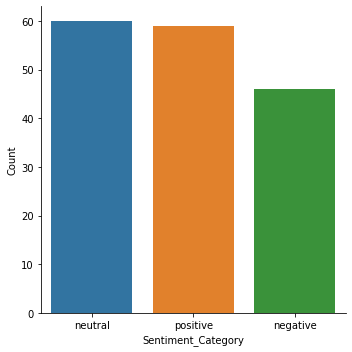

In [51]:
data = pd.DataFrame(news_df['Sentiment_Category'].value_counts())
data = data.reset_index()
data.columns = ['Sentiment_Category','Count']
sns.catplot(x="Sentiment_Category", y="Count", data=data,kind="bar")

In [52]:
data

,Sentiment_Category,Count
0,neutral,60
1,positive,59
2,negative,46


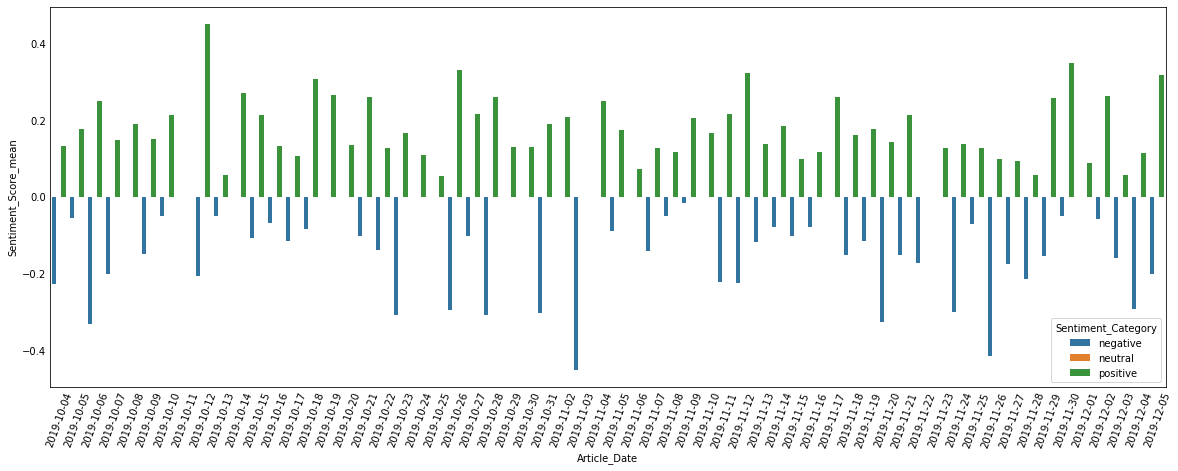

In [28]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(x=news_df['Article_Date'], y=news_df['Sentiment_Score_mean'], hue=news_df['Sentiment_Category'],ax=ax)
plt.xticks(rotation=70)
plt.tick_params(length=0)

In [29]:
news_df2 = news_df.iloc[0:79,:].copy()
news_df3 = news_df.iloc[79:165,:].copy()

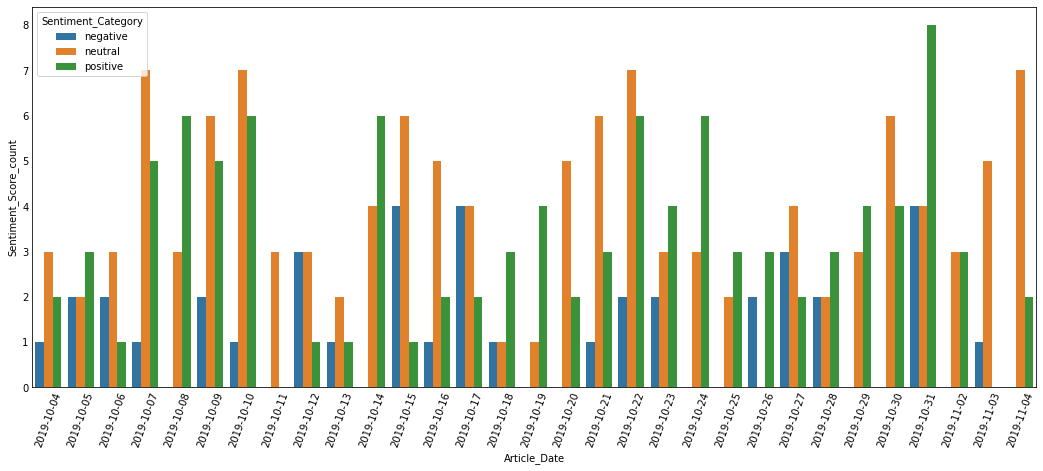

In [30]:
fig, ax = plt.subplots(figsize=(18,7))
sns.barplot(x=news_df2['Article_Date'], y=news_df2['Sentiment_Score_count'],hue=news_df2['Sentiment_Category'],ax=ax)
plt.xticks(rotation=70)
plt.tick_params(length=0)

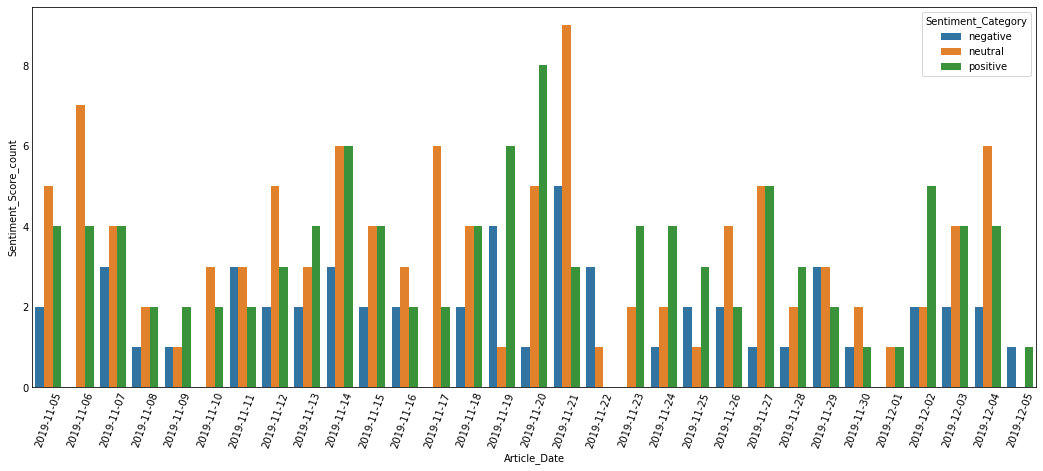

In [31]:
fig, ax = plt.subplots(figsize=(18,7))
sns.barplot(x=news_df3['Article_Date'], y=news_df3['Sentiment_Score_count'],hue=news_df3['Sentiment_Category'],ax=ax)
plt.xticks(rotation=70)
plt.tick_params(length=0)

In [32]:
news_df4 = pd.pivot_table(news_df, values=['Sentiment_Score_count',
             'Sentiment_Score_mean',
              'Sentiment_Score_std',
            'Sentiment_Score_min',
              'Sentiment_Score_25%',
             'Sentiment_Score_50%',
            'Sentiment_Score_75%', 'Sentiment_Score_max'], index='Article_Date',
                     columns='Sentiment_Category')
news_df4 = news_df4.reset_index()
news_df4

Article_Date Sentiment_Score_25%                   \
Sentiment_Category                         negative neutral positive   
0                    2019-10-04            -0.22500     0.0  0.10100   
1                    2019-10-05            -0.07125     0.0  0.14050   
2                    2019-10-06            -0.41450     0.0  0.25000   
3                    2019-10-07            -0.20000     0.0  0.08100   
4                    2019-10-08                 NaN     0.0  0.14200   
..                          ...                 ...     ...      ...   
57                   2019-12-01                 NaN     0.0  0.08800   
58                   2019-12-02            -0.07900     0.0  0.16700   
59                   2019-12-03            -0.22900     0.0  0.04525   
60                   2019-12-04            -0.29100     0.0  0.06500   
61                   2019-12-05            -0.20000     NaN  0.31800   

                   Sentiment_Score_50%                  Sentiment_Score_75%  \
Sentiment_Category            negative neutral positive            negative   
0                              -0.2250     0.0    0.134            -0.22500   
1                              -0.0555     0.0    0.250            -0.03975   
2                              -0.3290     0.0    0.250            -0.24350   
3                              -0.2000     0.0    0.104            -0.20000   
4                                  NaN     0.0    0.205                 NaN   
..                                 ...     ...      ...                 ...   
57                                 NaN     0.0    0.088                 NaN   
58                             -0.0580     0.0    0.225            -0.03700   
59                             -0.1580     0.0    0.062            -0.08700   
60                             -0.2900     0.0    0.093            -0.28900   
61                             -0.2000     NaN    0.318            -0.20000   

                                    Sentiment_Score_count                   \
Sentiment_Category neutral positive              negative neutral positive   
0                      0.0  0.16700                   1.0     3.0      2.0   
1                      0.0  0.25000                   2.0     2.0      3.0   
2                      0.0  0.25000                   2.0     3.0      1.0   
3                      0.0  0.25000                   1.0     7.0      5.0   
4                      0.0  0.25000                   NaN     3.0      6.0   
..                     ...      ...                   ...     ...      ...   
57                     0.0  0.08800                   NaN     1.0      1.0   
58                     0.0  0.43300                   2.0     2.0      5.0   
59                     0.0  0.07525                   2.0     4.0      4.0   
60                     0.0  0.14200                   2.0     6.0      4.0   
61                     NaN  0.31800                   1.0     NaN      1.0   

                   Sentiment_Score_max                  Sentiment_Score_mean  \
Sentiment_Category            negative neutral positive             negative   
0                               -0.225     0.0    0.200              -0.2250   
1                               -0.024     0.0    0.250              -0.0555   
2                               -0.158     0.0    0.250              -0.3290   
3                               -0.200     0.0    0.250              -0.2000   
4                                  NaN     0.0    0.300                  NaN   
..                                 ...     ...      ...                  ...   
57                                 NaN     0.0    0.088                  NaN   
58                              -0.016     0.0    0.443              -0.0580   
59                              -0.016     0.0    0.079              -0.1580   
60                              -0.288     0.0    0.214              -0.2900   
61                              -0.200     NaN    0.318              -0.2000   

In [33]:
news_df4.columns

MultiIndex([(         'Article_Date',         ''),
            (  'Sentiment_Score_25%', 'negative'),
            (  'Sentiment_Score_25%',  'neutral'),
            (  'Sentiment_Score_25%', 'positive'),
            (  'Sentiment_Score_50%', 'negative'),
            (  'Sentiment_Score_50%',  'neutral'),
            (  'Sentiment_Score_50%', 'positive'),
            (  'Sentiment_Score_75%', 'negative'),
            (  'Sentiment_Score_75%',  'neutral'),
            (  'Sentiment_Score_75%', 'positive'),
            ('Sentiment_Score_count', 'negative'),
            ('Sentiment_Score_count',  'neutral'),
            ('Sentiment_Score_count', 'positive'),
            (  'Sentiment_Score_max', 'negative'),
            (  'Sentiment_Score_max',  'neutral'),
            (  'Sentiment_Score_max', 'positive'),
            ( 'Sentiment_Score_mean', 'negative'),
            ( 'Sentiment_Score_mean',  'neutral'),
            ( 'Sentiment_Score_mean', 'positive'),
            (  'Sentiment_Score

In [34]:
news_df4.columns = [ 'Article_Date','Sentiment_Score_25%_negative','Sentiment_Score_25%_neutral',
                'Sentiment_Score_25%_positive','Sentiment_Score_50%_negative','Sentiment_Score_50%_neutral',
                'Sentiment_Score_50%_positive','Sentiment_Score_75%_negative','Sentiment_Score_75%_neutral',
                'Sentiment_Score_75%_positive','Sentiment_Score_count_negative','Sentiment_Score_count_neutral',
                'Sentiment_Score_count_positive','Sentiment_Score_max_negative','Sentiment_Score_max_neutral',
                'Sentiment_Score_max_positive','Sentiment_Score_mean_negative','Sentiment_Score_mean_neutral',
                'Sentiment_Score_mean_positive','Sentiment_Score_min_negative','Sentiment_Score_min_neutral',
                'Sentiment_Score_min_positive','Sentiment_Score_std_negative','Sentiment_Score_std_neutral',
              'Sentiment_Score_std_positive']
news_df4.head()

,Article_Date,Sentiment_Score_25%_negative,Sentiment_Score_25%_neutral,Sentiment_Score_25%_positive,Sentiment_Score_50%_negative,Sentiment_Score_50%_neutral,Sentiment_Score_50%_positive,Sentiment_Score_75%_negative,Sentiment_Score_75%_neutral,Sentiment_Score_75%_positive,Sentiment_Score_count_negative,Sentiment_Score_count_neutral,Sentiment_Score_count_positive,Sentiment_Score_max_negative,Sentiment_Score_max_neutral,Sentiment_Score_max_positive,Sentiment_Score_mean_negative,Sentiment_Score_mean_neutral,Sentiment_Score_mean_positive,Sentiment_Score_min_negative,Sentiment_Score_min_neutral,Sentiment_Score_min_positive,Sentiment_Score_std_negative,Sentiment_Score_std_neutral,Sentiment_Score_std_positive
0,2019-10-04,-0.22500,0.0,0.1010,-0.2250,0.0,0.134,-0.22500,0.0,0.167,1.0,3.0,2.0,-0.225,0.0,0.20,-0.2250,0.0,0.134000,-0.225,0.0,0.068,NaN,0.0,0.093338
1,2019-10-05,-0.07125,0.0,0.1405,-0.0555,0.0,0.250,-0.03975,0.0,0.250,2.0,2.0,3.0,-0.024,0.0,0.25,-0.0555,0.0,0.177000,-0.087,0.0,0.031,0.044548,0.0,0.126440
2,2019-10-06,-0.41450,0.0,0.2500,-0.3290,0.0,0.250,-0.24350,0.0,0.250,2.0,3.0,1.0,-0.158,0.0,0.25,-0.3290,0.0,0.250000,-0.500,0.0,0.250,0.241831,0.0,NaN
3,2019-10-07,-0.20000,0.0,0.0810,-0.2000,0.0,0.104,-0.20000,0.0,0.250,1.0,7.0,5.0,-0.200,0.0,0.25,-0.2000,0.0,0.149400,-0.200,0.0,0.062,NaN,0.0,0.093031
4,2019-10-08,NaN,0.0,0.1420,NaN,0.0,0.205,NaN,0.0,0.250,NaN,3.0,6.0,NaN,0.0,0.30,NaN,0.0,0.190167,NaN,0.0,0.045,NaN,0.0,0.093958


In [55]:
news_df4.to_csv('sentiment_score_news.csv', sep=',', encoding='utf-8',index=False)